# StyleClip_Optimization

## Install

In [ ]:
# multilingual clip set up 
!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=<CUDA_VERSION>
!pip install ftfy regex tqdm gdown
!pip install transformers

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=<CUDA_VERSION>'
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=9b36f671df68360edd2342e0889b80ffe4fc8a20a0ebe3a800dcb6b8e1ff5adb
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy
     |████████████████████████████████| 3.1 MB 9.1 MB/s 
     |████████████████████████████████| 895 kB 41.2 MB/s 
     |████████████████████████████████| 59 kB 7.3 MB/s 
     |████████████████████████████████| 3.3 MB 34.0 MB/s 
     |████████████████████████████████| 596 kB 46.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import os
os.chdir('/content/')

!git clone https://github.com/orpatashnik/StyleCLIP.git

os.chdir(f'./StyleCLIP')

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# downloads StyleGAN's weights and facial recognition network weights
ids = ['1EM87UquaoQmk17Q8d5kYIAHqu0dkYqdT', '1N0MZSqPRJpLfP4mFQCS14ikrVSe8vQlL']
for file_id in ids:
  downloaded = drive.CreateFile({'id':file_id})
  downloaded.FetchMetadata(fetch_all=True)
  downloaded.GetContentFile(downloaded.metadata['title'])

Cloning into 'StyleCLIP'...
remote: Enumerating objects: 597, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 597 (delta 52), reused 109 (delta 41), pack-reused 461
Receiving objects: 100% (597/597), 164.45 MiB | 33.15 MiB/s, done.
Resolving deltas: 100% (188/188), done.
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-7j_ixa6a
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-7j_ixa6a
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369106 sha256=269b883195d4410931c8cfda02dddf310f2e904d42b24bda64b8a87c4b9912d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-rx1mqa8a/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [ ]:
# multilingual-clip gitclone inside styleclip 
!git clone https://github.com/FreddeFrallan/Multilingual-CLIP
%cd Multilingual-CLIP
!bash get-weights.sh

Cloning into 'Multilingual-CLIP'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 419 (delta 57), reused 27 (delta 6), pack-reused 314
Receiving objects: 100% (419/419), 7.94 MiB | 12.80 MiB/s, done.
Resolving deltas: 100% (196/196), done.
/content/StyleCLIP/Multilingual-CLIP
--2021-11-14 01:49:33--  https://www.dropbox.com/s/s77xw5308jeljlp/Swedish-500k%20Linear%20Weights.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s77xw5308jeljlp/Swedish-500k%20Linear%20Weights.pkl [following]
--2021-11-14 01:49:33--  https://www.dropbox.com/s/raw/s77xw5308jeljlp/Swedish-500k%20Linear%20Weights.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 F

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os, random
import torch

### Args

In [ ]:
# args 입력 
experiment_type = 'edit' #@param ['edit', 'free_generation']

description = '보라색 머리카락을 가진 사람' #@param {type:"string"}

latent_path = None #@param {type:"string"}

optimization_steps = 50 #@param {type:"number"}

l2_lambda = 0.008 #@param {type:"number"}

id_lambda = 0.005 #@param {type:"number"}

stylespace = False #@param {type:"boolean"}

create_video = True #@param {type:"boolean"}

use_seed = True #@param {type:"boolean"}

seed = 1 #@param {type:"boolean"}

In [ ]:
args = {
    "description": description,
    "ckpt": "stylegan2-ffhq-config-f.pt",
    "stylegan_size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "id_lambda": id_lambda,
    'work_in_stylespace': stylespace,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 20,
    "results_dir": "results",
    "ir_se50_weights": "model_ir_se50.pth"
}

from argparse import Namespace
args = Namespace(**args)

if use_seed:
  import torch
  torch.manual_seed(seed)

In [ ]:
# stylegan2 generator 실행
import os
os.chdir(f'/content/StyleCLIP')

import torch
from models.stylegan2.model import Generator

g_ema = Generator(args.stylegan_size, 512, 8)
g_ema.load_state_dict(torch.load('stylegan2-ffhq-config-f.pt')["g_ema"], strict=False)
g_ema.eval()
g_ema = g_ema.cuda()

In [ ]:
import sys
os.chdir('/content/StyleCLIP')
sys.path.append(".")
sys.path.append("..")

os.makedirs(args.results_dir, exist_ok=True)

### 1.  text input 받아오기

이부분은 PASS

### 2. latent initialize

Given a textual description,    
- one can both edit a given image,    
- or generate a random image that best fits to the description


In [ ]:
##### initialize a random latent vector #####
# mean_latent 
mean_latent = g_ema.mean_latent(4096)

# latent path가 있을 때 (custom image -> latent path)
if args.latent_path:
    latent_code_init = torch.load(args.latent_path).cuda()

# args.mode == edit
# 정규분포에서 랜덤하게 벡터를 받아와 -> latent code 생성
elif args.mode == "edit":
    latent_code_init_not_trunc = torch.randn(1, 512).cuda()
    with torch.no_grad():
        _, latent_code_init, _ = g_ema([latent_code_init_not_trunc], return_latents=True,
                                    truncation=args.truncation, truncation_latent=mean_latent)
        
# args.mode == free generation
# generator의 mean latent를 받아옴 
else:
    latent_code_init = mean_latent.detach().clone().repeat(1, 18, 1)

# latent에 해당하는 원본 이미지
with torch.no_grad():
    img_orig, _ = g_ema([latent_code_init], input_is_latent=True, randomize_noise=False)

# w+ 가 아니라 S space에서 진행할 때 (논문 이후 추가된 사항)
if args.work_in_stylespace:
    with torch.no_grad():
        _, _, latent_code_init = g_ema([latent_code_init], input_is_latent=True, return_latents=True)
    latent = [s.detach().clone() for s in latent_code_init]
    for c, s in enumerate(latent):
        if c in STYLESPACE_INDICES_WITHOUT_TORGB:
            s.requires_grad = True

# latent vactor update -> yes
else:
    latent = latent_code_init.detach().clone()
    latent.requires_grad = True

/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)


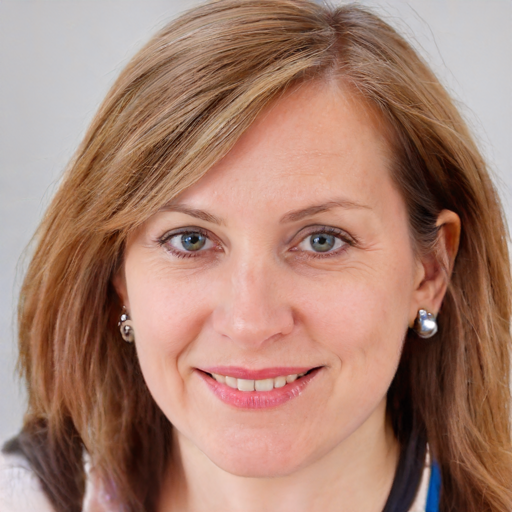

In [ ]:
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage

# Visualize a random latent vector.
image = ToPILImage()(make_grid(img_orig.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = image.size
image.resize((h // 2, w // 2))

### 3. Loss 정의

multilingual clip import 전에 경로 수정하기

In [ ]:
# 1. multilingual-clip 폴더명 수정
os.rename('/content/StyleCLIP/Multilingual-CLIP', '/content/StyleCLIP/MultilingualCLIP')

In [ ]:
#2. 아래 빨간 박스의 파일에서 블럭처리 된 것처럼 경로 수정

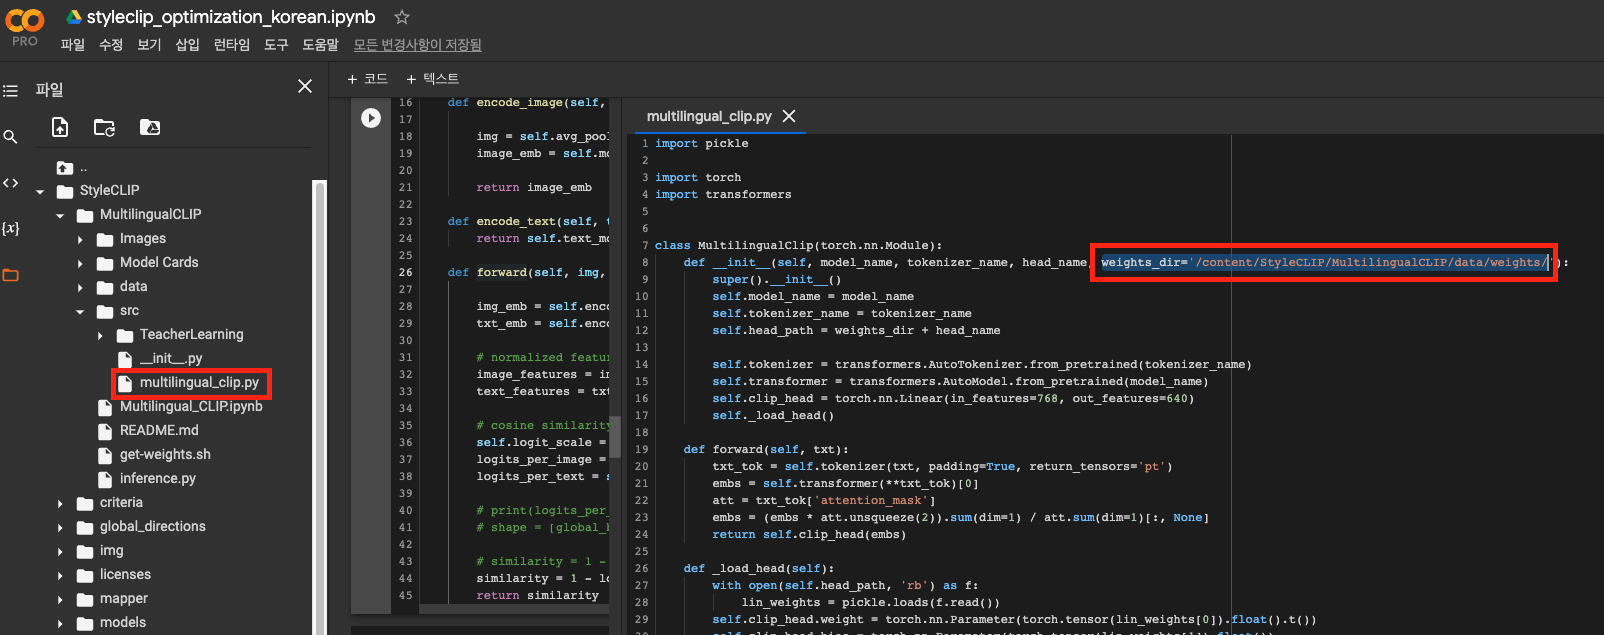

In [ ]:
# clip loss

import clip
from MultilingualCLIP.src import multilingual_clip


class CLIPLoss(torch.nn.Module):

    def __init__(self):
        super(CLIPLoss, self).__init__()
        self.model, self.preprocess = clip.load("ViT-B/32", device="cuda")
        self.text_model = multilingual_clip.load_model('M-BERT-Base-ViT-B')
        self.upsample = torch.nn.Upsample(scale_factor=7)
        self.avg_pool = torch.nn.AvgPool2d(kernel_size=32)

    def encode_image(self, img):
        
        img = self.avg_pool(self.upsample(img))
        image_emb = self.model.encode_image(img).float()
        
        return image_emb

    def encode_text(self, txt):
        return self.text_model(args.description).cuda()

    def forward(self, img, txt):   
 
        img_emb = self.encode_image(img)
        txt_emb = self.encode_text(txt)

        # normalized features
        image_features = img_emb / img_emb.norm(dim=-1, keepdim=True)
        text_features = txt_emb / txt_emb.norm(dim=-1, keepdim=True)

        # cosine similarity as logits
        self.logit_scale = self.model.logit_scale.exp()
        logits_per_image = self.logit_scale * image_features @ text_features.t()
        logits_per_text = self.logit_scale * text_features @ image_features.t()

        # print(logits_per_image, logits_per_text)
        # shape = [global_batch_size, global_batch_size]

        # similarity = 1 - self.model(image, text)[0] / 100
        similarity = 1 - logits_per_image/ 100
        return similarity

In [ ]:
# multilingual로 교체된 결과 확인
clip_loss = CLIPLoss()
img_gen, _ = g_ema([latent], input_is_latent=True, randomize_noise=False, input_is_stylespace=args.work_in_stylespace)

c_loss = clip_loss(img_gen, args.description)
c_loss

In [ ]:
# ID Loss 
import torch
from torch import nn

from models.facial_recognition.model_irse import Backbone


class IDLoss(nn.Module):
    def __init__(self, opts):
        super(IDLoss, self).__init__()
        print('Loading ResNet ArcFace')
        self.facenet = Backbone(input_size=112, num_layers=50, drop_ratio=0.6, mode='ir_se')
        self.facenet.load_state_dict(torch.load(opts.ir_se50_weights))
        self.pool = torch.nn.AdaptiveAvgPool2d((256, 256))
        self.face_pool = torch.nn.AdaptiveAvgPool2d((112, 112))
        self.facenet.eval()
        self.facenet.cuda()
        self.opts = opts

    def extract_feats(self, x):
        if x.shape[2] != 256:
            x = self.pool(x)
        x = x[:, :, 35:223, 32:220]  # Crop interesting region
        x = self.face_pool(x)
        x_feats = self.facenet(x)
        return x_feats

    def forward(self, y_hat, y):
        n_samples = y.shape[0]
        y_feats = self.extract_feats(y)  # Otherwise use the feature from there
        y_hat_feats = self.extract_feats(y_hat)
        y_feats = y_feats.detach()
        loss = 0
        sim_improvement = 0
        count = 0
        for i in range(n_samples):
            diff_target = y_hat_feats[i].dot(y_feats[i])
            loss += 1 - diff_target
            count += 1

        return loss / count, sim_improvement / count

In [ ]:
from torch import optim
clip_loss = CLIPLoss()
id_loss = IDLoss(args)

if args.work_in_stylespace:
    optimizer = optim.Adam(latent, lr=args.lr)
else:
    optimizer = optim.Adam([latent], lr=args.lr)

Loading ResNet ArcFace


### 4. 학습

In [ ]:
# The learning rate adjustment function.
def get_lr(t, initial_lr, rampdown=0.50, rampup=0.05):
    lr_ramp = min(1, (1 - t) / rampdown)
    lr_ramp = 0.5 - 0.5 * math.cos(lr_ramp * math.pi)
    lr_ramp = lr_ramp * min(1, t / rampup)

    return initial_lr * lr_ramp

In [ ]:
import os
import math 

import torch
import torchvision
from torch import optim
from tqdm import tqdm

from mapper.training.train_utils import STYLESPACE_DIMENSIONS
from utils import ensure_checkpoint_exists

pbar = tqdm(range(args.step))
# pbar = tqdm(range(100))

for i in pbar:
  # Adjust the learning rate
  t = i / args.step
  lr = get_lr(t, args.lr)
  optimizer.param_groups[0]["lr"] = lr

  # Generate an image using the latent vector
  img_gen, _ = g_ema([latent], input_is_latent=True, randomize_noise=False, input_is_stylespace=args.work_in_stylespace)

  # Loss 계산
  # CLIP 
  c_loss = clip_loss(img_gen, args.description)

  # ID 
  if args.id_lambda > 0:
      i_loss = id_loss(img_gen, img_orig)[0]
  else:
      i_loss = 0

  # L2
  if args.mode == "edit":
      if args.work_in_stylespace:
          l2_loss = sum([((latent_code_init[c] - latent[c]) ** 2).sum() for c in range(len(latent_code_init))])
      else:
          l2_loss = ((latent_code_init - latent) ** 2).sum()
      loss = c_loss + args.l2_lambda * l2_loss + args.id_lambda * i_loss
      # edit 모드일 경우 논문에 나온 full term loss 
  else:
      loss = c_loss
      # 아닐 경우, clip loss 만 


  # gradient descent -> update latent vector 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # log 출력 
  pbar.set_description(
      (
          f"loss: {loss.item():.4f};"
      )
  )
  if args.save_intermediate_image_every > 0 and i % args.save_intermediate_image_every == 0:
      with torch.no_grad():
          img_gen, _ = g_ema([latent], input_is_latent=True, randomize_noise=False, input_is_stylespace=args.work_in_stylespace)

      torchvision.utils.save_image(img_gen, f"results/{str(i).zfill(5)}.jpg", normalize=True, range=(-1, 1))

if args.mode == "edit":
  final_result = torch.cat([img_orig, img_gen])
else:
  final_result = img_gen

loss: 0.8207;:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
loss: 0.7343;: 100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)


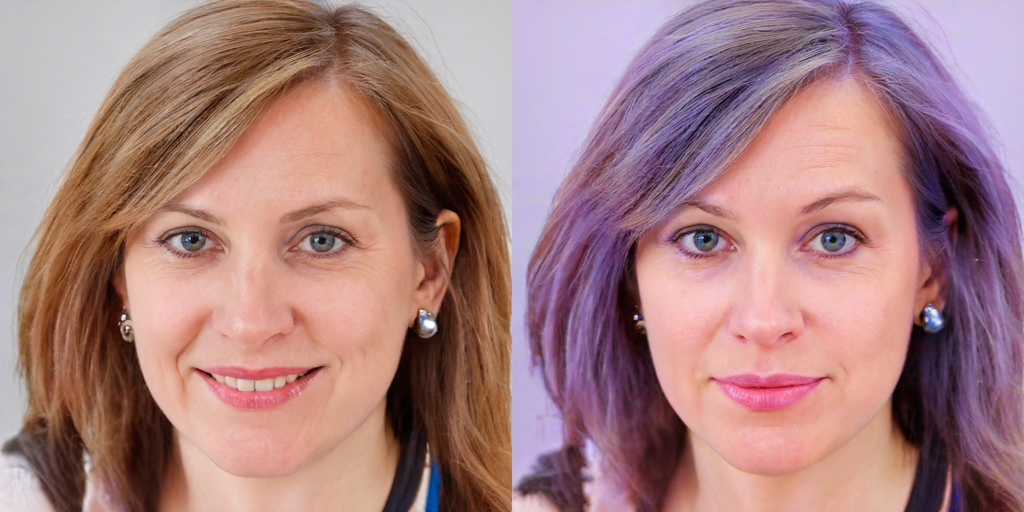

In [ ]:
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(final_result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))

### 5. 함수화

In [ ]:
# original code 

def main(args):
    ensure_checkpoint_exists(args.ckpt)
    # text_inputs = torch.cat([clip.tokenize(args.description)]).cuda() # multilingual에서는 삭제 
    os.makedirs(args.results_dir, exist_ok=True)

    g_ema = Generator(args.stylegan_size, 512, 8)
    g_ema.load_state_dict(torch.load(args.ckpt)["g_ema"], strict=False)
    g_ema.eval()
    g_ema = g_ema.cuda()
    mean_latent = g_ema.mean_latent(4096)

    if args.latent_path:
        latent_code_init = torch.load(args.latent_path).cuda()
    elif args.mode == "edit":
        latent_code_init_not_trunc = torch.randn(1, 512).cuda()
        with torch.no_grad():
            _, latent_code_init, _ = g_ema([latent_code_init_not_trunc], return_latents=True,
                                        truncation=args.truncation, truncation_latent=mean_latent)
    else:
        latent_code_init = mean_latent.detach().clone().repeat(1, 18, 1)

    with torch.no_grad():
        img_orig, _ = g_ema([latent_code_init], input_is_latent=True, randomize_noise=False)

    if args.work_in_stylespace:
        with torch.no_grad():
            _, _, latent_code_init = g_ema([latent_code_init], input_is_latent=True, return_latents=True)
        latent = [s.detach().clone() for s in latent_code_init]
        for c, s in enumerate(latent):
            if c in STYLESPACE_INDICES_WITHOUT_TORGB:
                s.requires_grad = True
    else:
        latent = latent_code_init.detach().clone()
        latent.requires_grad = True

    clip_loss = CLIPLoss()
    id_loss = IDLoss(args)

    if args.work_in_stylespace:
        optimizer = optim.Adam(latent, lr=args.lr)
    else:
        optimizer = optim.Adam([latent], lr=args.lr)

    pbar = tqdm(range(args.step))
    # pbar = tqdm(range(100))

    for i in pbar:
    # Adjust the learning rate
        t = i / args.step
        lr = get_lr(t, args.lr)
        optimizer.param_groups[0]["lr"] = lr

        # Generate an image using the latent vector
        img_gen, _ = g_ema([latent], input_is_latent=True, randomize_noise=False, input_is_stylespace=args.work_in_stylespace)

        # Loss 계산
        # CLIP 
        c_loss = clip_loss(img_gen, args.description)

        # ID 
        if args.id_lambda > 0:
            i_loss = id_loss(img_gen, img_orig)[0]
        else:
            i_loss = 0

        # L2
        if args.mode == "edit":
            if args.work_in_stylespace:
                l2_loss = sum([((latent_code_init[c] - latent[c]) ** 2).sum() for c in range(len(latent_code_init))])
            else:
                l2_loss = ((latent_code_init - latent) ** 2).sum()
            loss = c_loss + args.l2_lambda * l2_loss + args.id_lambda * i_loss
            # edit 모드일 경우 논문에 나온 full term loss 
        else:
            loss = c_loss
            # 아닐 경우, clip loss 만 


        # gradient descent -> update latent vector 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # log 출력 
        pbar.set_description(
            (
                f"loss: {loss.item():.4f};"
            )
        )
        if args.save_intermediate_image_every > 0 and i % args.save_intermediate_image_every == 0:
            with torch.no_grad():
                img_gen, _ = g_ema([latent], input_is_latent=True, randomize_noise=False, input_is_stylespace=args.work_in_stylespace)

            torchvision.utils.save_image(img_gen, f"results/{str(i).zfill(5)}.jpg", normalize=True, range=(-1, 1))

        if args.mode == "edit":
            final_result = torch.cat([img_orig, img_gen])
        else:
            final_result = img_gen
    
    return final_result

In [ ]:
final_result = main(args)

Loading ResNet ArcFace


loss: 0.8227;:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
loss: 0.7401;: 100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)


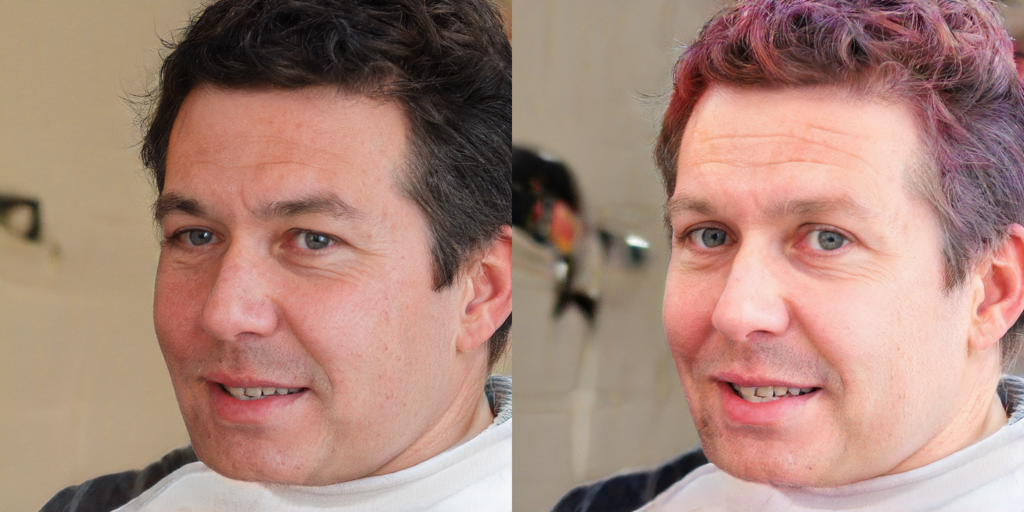

In [ ]:
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(final_result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))